
# **Supply Chain Dataset Analysis**

# **1. Problem Definition**

Supply Chain data is important for many businesses as it can play a significant role in the distribution of their products. For example, based on data from a Supply Chain dataset a organization may focused to invest their adds in areas where people buy more products online. Likewise, it will also help businesses to determine prices of its products and forecast sales. Governments may also be interested to know the situation of the Supply Chain to carry out effective economic and development plans.

This project's main goal is to study this dataset and analize its data to have a deeper understanding of what is behind different trends and to determine whether the sales profits will increase or decrease in the future years. Here, we will first collect the relevant data set, focused on how much was the profit in each year. Once we collect the data, we will prepare the data using pandas, numpy and visualize the data to determine the relationship between the variables. After studying the data set, we will preprocess the data using python where we will eliminate the outliers and manage missing values. Once we successfully preprocess the data, we will make use of python’s supervised learning packages and algorithms to build our model. Once we prepare the model, we will access the model based upon its accuracy, sensitivity, and specificity. If the model meets our requirements, we will deploy the model to make predictions on income level of individuals.

Studying supply chain is important for several reasons, and it can be instrumental in predicting future strategies for a business. It can be important to Understand Demand-Supply Dynamics, Anticipate Supply Shortages or Surpluses, Identify Cost Savings Opportunities, and Enhance Forecasting and Planning.

In this case, by studying the profit in the past years, we will be able to predict what will the profit look like in the years to come, which allows the company to decide what strategies to go for, such as decreasing the price in case the profit goes down.

# **2. The Dataset**

The original dataset was obtained from Kaggle, an online community of data scientists and machine learning practitioners. The DataSet of Supply Chains was used by the company DataCo Global for analysis, allowing the use of Machine Learning Algorithms and R Software.

Areas of important registered activities: Provisioning , Production , Sales , Commercial Distribution.

The most important information captured in this Supply Chain database consists of:

* Days for Shipping: The amount of day that would take to deliver the order.
* Category Name: Category of each item, such as Sporting Goods or eletronics.
* Customer Segment: Informs if the costumer is Coporation, a Home Office or a regular customer.
* Department Name: The department which the item sold belongs, such as Firness  or Technology Department.
* Order Country: Country where this order will be delivered to.
* Order State: The State in each country where the order is goinf to.
* Order Item Profit Ratio: The profit in each order.
* Sales: The amount in sales for each order.
* Shipping Date: When the order is supposed to be shipped.
* Shipping Mode: What kind of shipping method was chosen, such as First Class or Second Class.

Source: Kaggle

#**3. Importing modules**

In [23]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from imblearn. over_sampling import SMOTE


#**4. Importing Dataset**

In [24]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#**5. Exploratory Data Analysis**

### Determining the shape of the dataset

In [25]:
df.shape

(180519, 53)

As we can see, there are 180,519 rows (records) and 53 columns in our dataset.

###Listing the columns of the dataset

In [26]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### Replacing spaces (' ') between Column names with '_'

In [27]:
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter==" ":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""


###Replacing old columns with new_columns

In [28]:
df.columns=new_columns

Our column names had too many spaces and we decided to change it to '_' to avoid any issues with Pandas

###Determining dataframe columns characteristics

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Id                    180519 non-null  int64  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname                

###Listing datatypes of the columns

In [30]:
df.dtypes

,0
Type,object
Days_for_shipping_(real),int64
Days_for_shipment_(scheduled),int64
Benefit_per_order,float64
Sales_per_customer,float64
Delivery_Status,object
Late_delivery_risk,int64
Category_Id,int64
Category_Name,object
Customer_City,object


###Descriptive Analytics of quantitative variables in the dataframe

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days_for_shipping_(real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days_for_shipment_(scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit_per_order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales_per_customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category_Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer_Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer_Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department_Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


The above table shows descriptive statistics for numerical variables in our dataset.

### Calculating and printing mode for categorical variables:

In [32]:
def mode(list_of_nums):
    average = list_of_nums.mode()
    return average

categorical_var = list(df.select_dtypes(include=object).columns)

#printing mode of categorical variables
for item in categorical_var:
    print(item + " mode: "+ mode(df[item]))


0    Type mode: DEBIT
Name: Type, dtype: object
0    Delivery_Status mode: Late delivery
Name: Delivery_Status, dtype: object
0    Category_Name mode: Cleats
Name: Category_Name, dtype: object
0    Customer_City mode: Caguas
Name: Customer_City, dtype: object
0    Customer_Country mode: EE. UU.
Name: Customer_Country, dtype: object
0    Customer_Email mode: XXXXXXXXX
Name: Customer_Email, dtype: object
0    Customer_Fname mode: Mary
Name: Customer_Fname, dtype: object
0    Customer_Lname mode: Smith
Name: Customer_Lname, dtype: object
0    Customer_Password mode: XXXXXXXXX
Name: Customer_Password, dtype: object
0    Customer_Segment mode: Consumer
Name: Customer_Segment, dtype: object
0    Customer_State mode: PR
Name: Customer_State, dtype: object
0    Customer_Street mode: 9126 Wishing Expressway
Name: Customer_Street, dtype: object
0    Department_Name mode: Fan Shop
Name: Department_Name, dtype: object
0    Market mode: LATAM
Name: Market, dtype: object
0    Order_City mode: Santo 

Above result shows the mode of each categorical columns in the dataset.

###Checking if any cells has missing values


In [33]:
df.isnull().sum()

,0
Type,0
Days_for_shipping_(real),0
Days_for_shipment_(scheduled),0
Benefit_per_order,0
Sales_per_customer,0
Delivery_Status,0
Late_delivery_risk,0
Category_Id,0
Category_Name,0
Customer_City,0


Above code checks whether there are any empty/blank cells in the dataset. As we can see, there are some empty cells in the **Customer_Zipcode, Order_Zipcode,Customer_Lname, and Product_Description** Collums

In [34]:
df['Order_Zipcode'] = df['Order_Zipcode'].replace(np.nan, '0')
df['Product_Description'] = df['Product_Description'].replace(np.nan, '0')
df['Customer_Zipcode'] = df['Customer_Zipcode'].replace(np.nan, '0')
df['Customer_Lname'] = df['Customer_Lname'].replace(np.nan, '0')


In [35]:
df.isnull().sum()

,0
Type,0
Days_for_shipping_(real),0
Days_for_shipment_(scheduled),0
Benefit_per_order,0
Sales_per_customer,0
Delivery_Status,0
Late_delivery_risk,0
Category_Id,0
Category_Name,0
Customer_City,0


Checking again after the change was made and we are all good.

### Now, we will be determining different attributes for categorical variables

In [36]:
categorical_var = list(df.select_dtypes(include=object).columns)
for item in categorical_var:
    print(item + ":")
    print(df[item].unique())

Type:
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
Delivery_Status:
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']
Category_Name:
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']
Customer_City:
['Caguas' 'San Jose' 'Los Angeles' 'Tonawanda' 'Miami' 'San Ramon'
 'Fre

Here, we do not see any placeholders like '?' which represents a missing or unknown value. So, we are good to go.

# **6. Data Visualization**

### a. Categorical Variables

In [37]:
categorical_var = list(df.select_dtypes(include=object).columns)

Creating bargraph for Delivery_Type

### Graph representing days of shipping(real), days of shipping(expected) for different Delivery_Status

Text(0.5, 0, '\n Delivery Status')

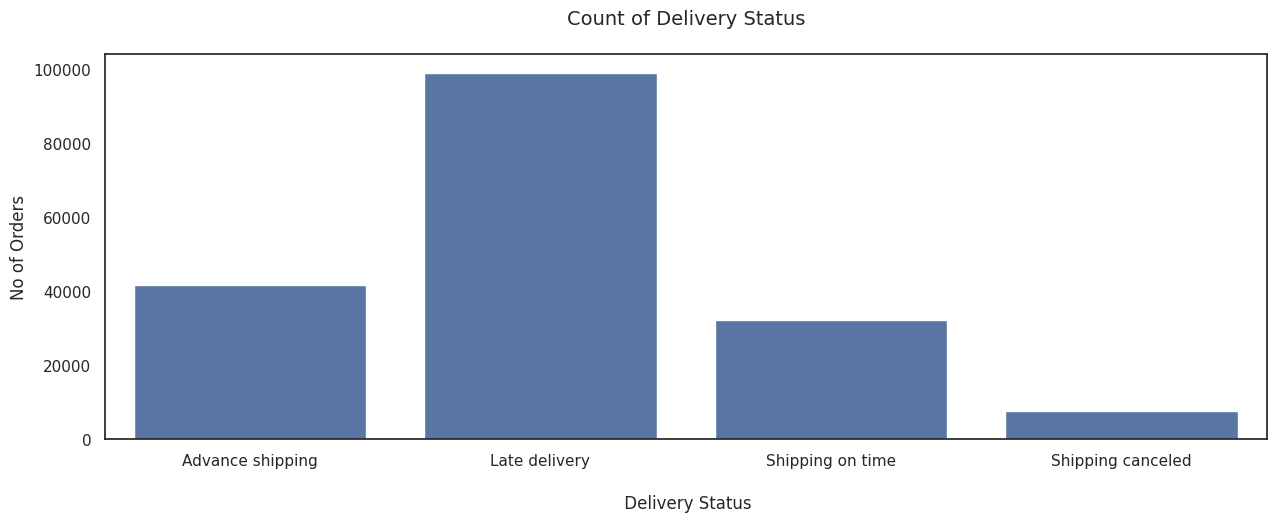

In [38]:
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="Delivery_Status", data=df)
plt.title("Count of Delivery Status\n",size =14)
plt.ylabel("No of Orders")
plt.xlabel("\n Delivery Status")

This graph shows that most of the orders had a Late Delivery Status

### Now we have to filter the DateOrders collum to obtain the only the year the orders were placed so we can make predictions over the future years.

In [39]:
df['order_date_(DateOrders)'] = pd.to_datetime(df['order_date_(DateOrders)'])
df['Order_YearMonth'] = df['order_date_(DateOrders)'].dt.strftime('%Y-%m')
df.head()
df['order_date_(DateOrders)'].head(20)


,order_date_(DateOrders)
0,2018-01-31 22:56:00
1,2018-01-13 12:27:00
2,2018-01-13 12:06:00
3,2018-01-13 11:45:00
4,2018-01-13 11:24:00
5,2018-01-13 11:03:00
6,2018-01-13 10:42:00
7,2018-01-13 10:21:00
8,2018-01-13 10:00:00
9,2018-01-13 09:39:00


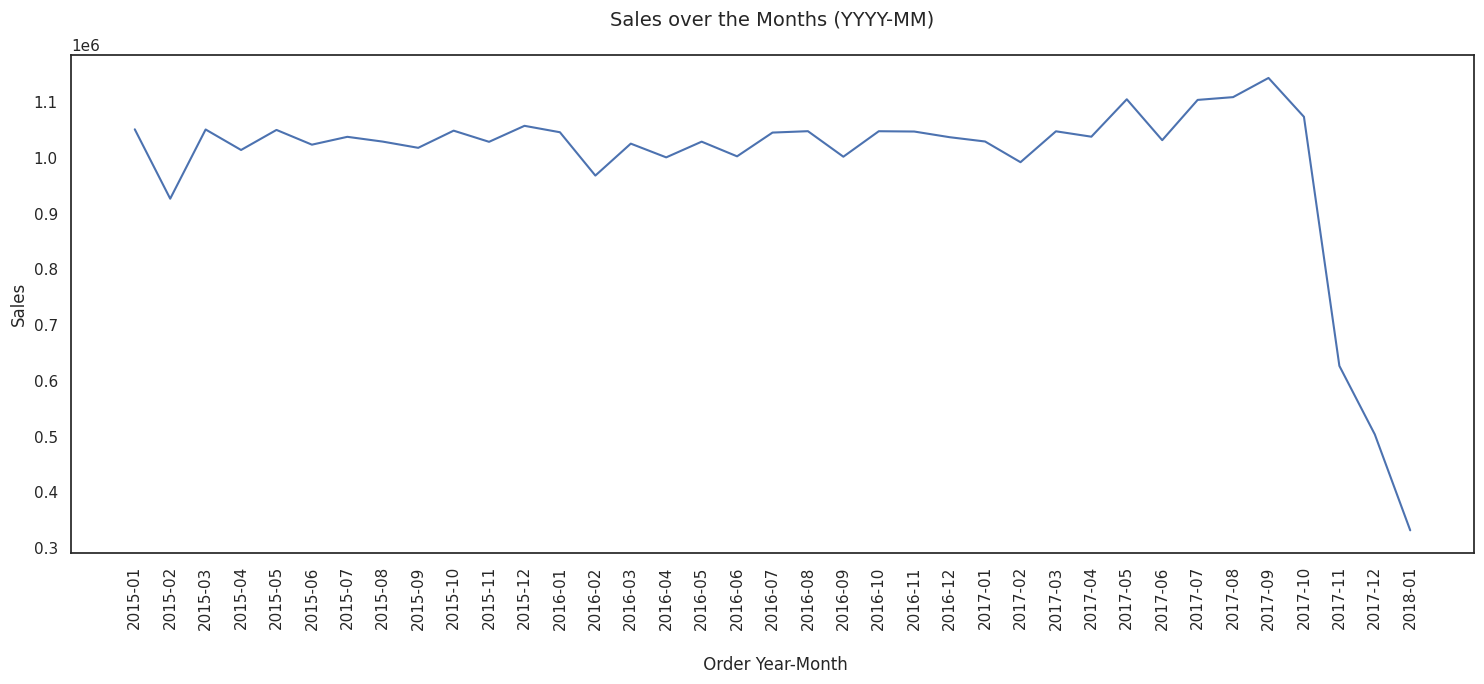

In [40]:
monthly_sales = df.groupby('Order_YearMonth')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.set(style='white')
sns.lineplot(x='Order_YearMonth', y='Sales', data=monthly_sales)
plt.title('Sales over the Months (YYYY-MM)\n', size=14)
plt.ylabel('Sales')
plt.xlabel('\n Order Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Drop Data from October 2017 Onwards

To address the issue of incomplete data from October 2017 onwards, especially for time-series analysis, I will filter the DataFrame to exclude all entries with an `Order_YearMonth` greater than or equal to '2017-10'.

In [41]:
print(f"Shape of DataFrame before dropping data: {df.shape}")

# Filter out data from 2017-10 and onwards
df = df[df['Order_YearMonth'] < '2017-11']

print(f"Shape of DataFrame after dropping data: {df.shape}")

display(df.tail())

Shape of DataFrame before dropping data: (180519, 54)
Shape of DataFrame after dropping data: (174217, 54)


,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode,Order_YearMonth
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,1004,45,0,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,1004,45,0,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,1004,45,0,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,1004,45,0,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,2016-01
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,1004,45,0,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class,2016-01


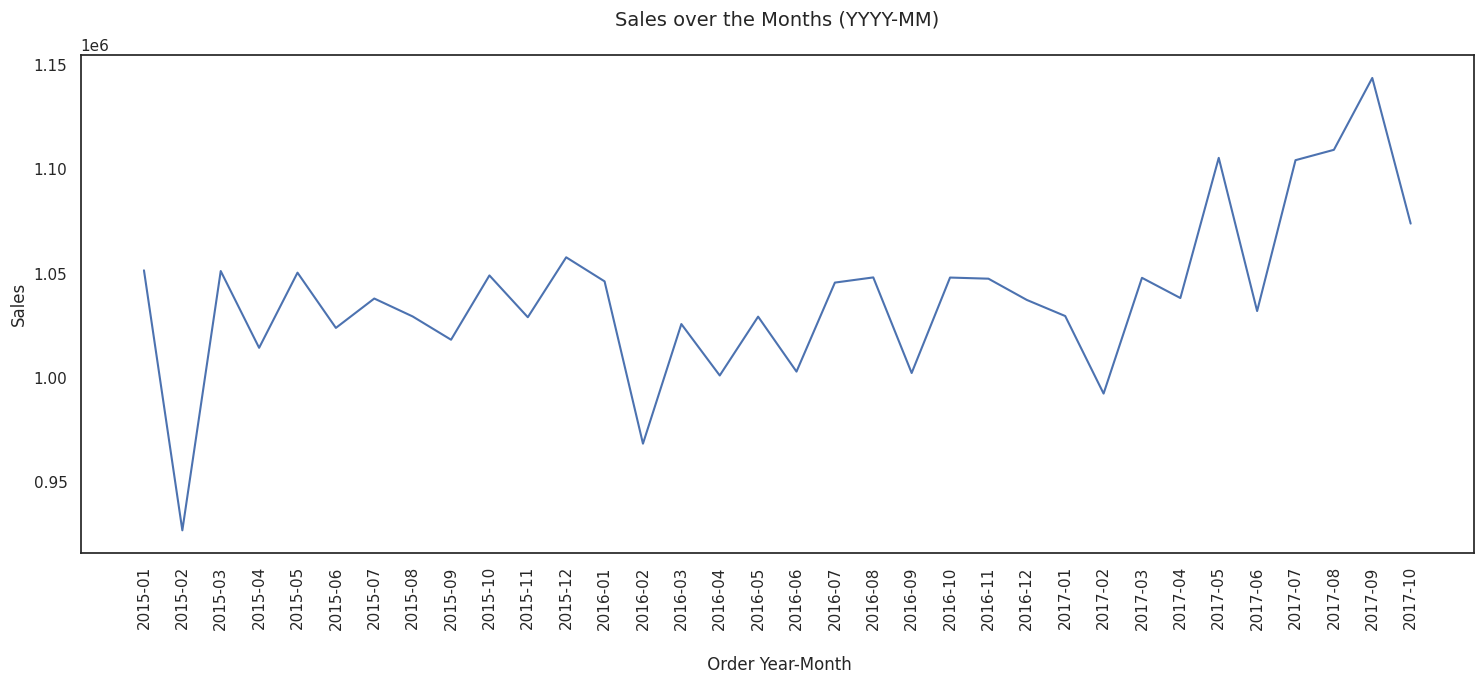

In [42]:
monthly_sales = df.groupby('Order_YearMonth')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.set(style='white')
sns.lineplot(x='Order_YearMonth', y='Sales', data=monthly_sales)
plt.title('Sales over the Months (YYYY-MM)\n', size=14)
plt.ylabel('Sales')
plt.xlabel('\n Order Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Barchart representing the relationship between Benefit Per Order with Delivery Status

Text(0.5, 0, '\n Delivery Status')

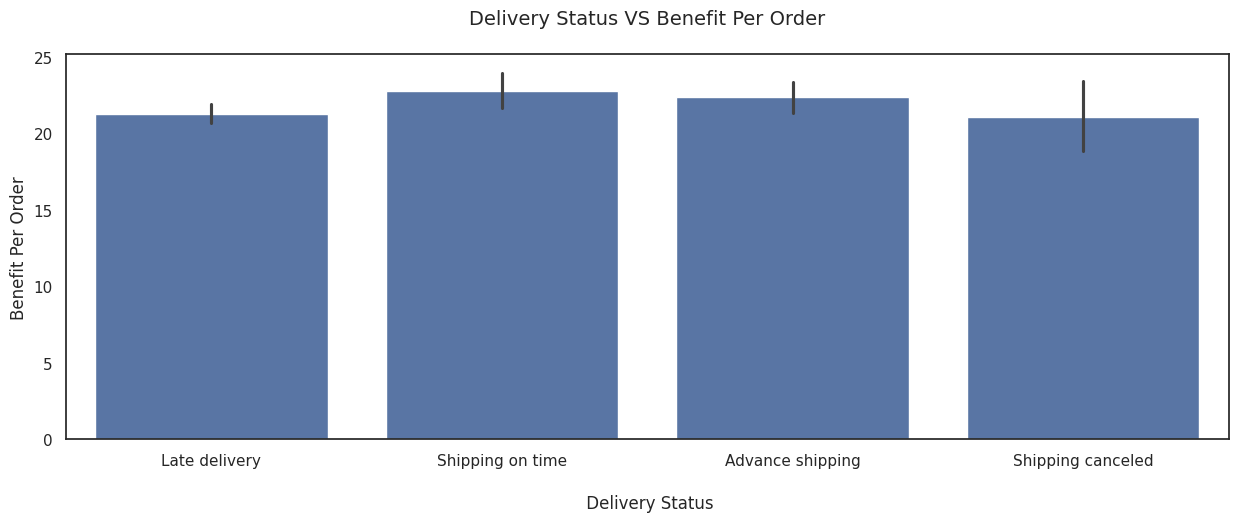

In [43]:
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.barplot(x="Delivery_Status", y="Benefit_per_order", data=df)
plt.title("Delivery Status VS Benefit Per Order\n",size =14)
plt.ylabel("Benefit Per Order")
plt.xlabel("\n Delivery Status")

This graph shows how On Time Shipping get the most Benefit per Order

### Graph representing the count for Category Name of Goods

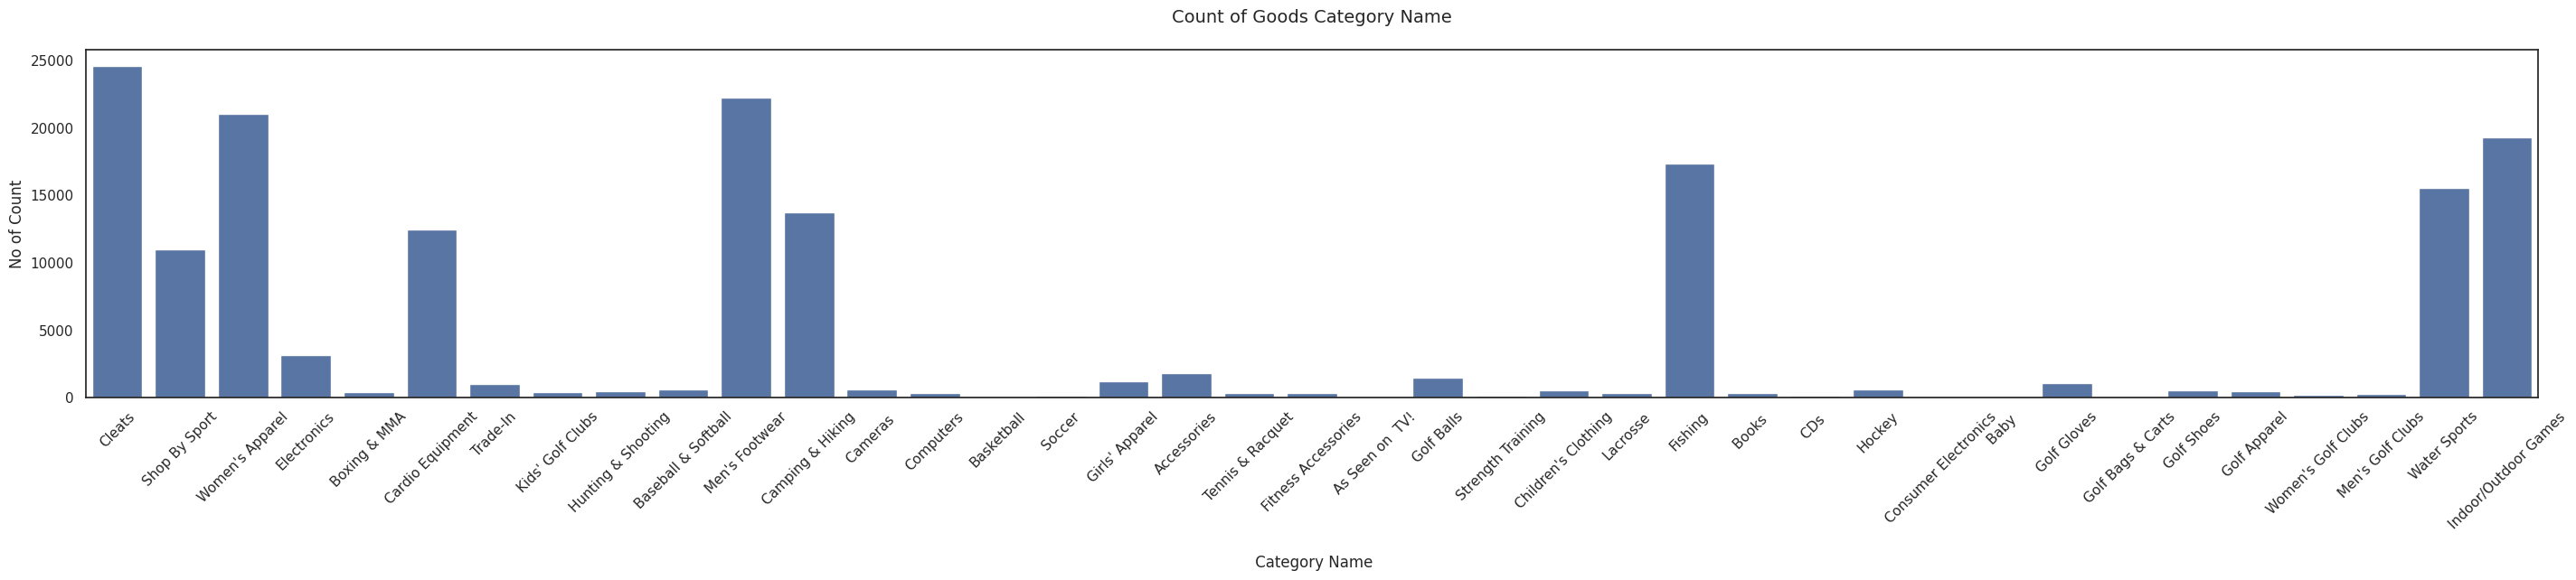

In [44]:
plt.figure(figsize=(35,5))
sns.set(style = 'white')
sns.countplot(x="Category_Name", data=df)
plt.title("Count of Goods Category Name\n",size =14)
plt.ylabel("No of Count")
plt.xlabel("\n Category Name")
plt.xticks(rotation=45)
plt.show()

As we can see, Cleats, Women's Appeal, and Men's Fotware are the item they have the most in stock.

### Pie Chart representing the count for Shipping Mode of Goods

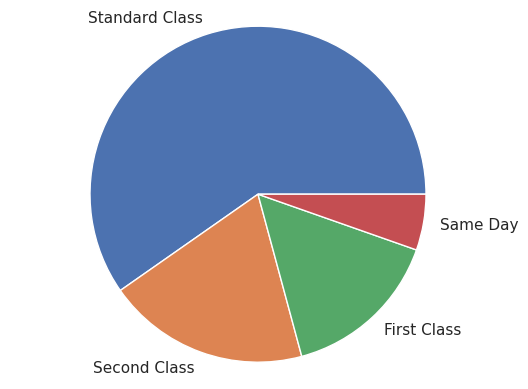

In [45]:

fig1, ax1 = plt.subplots()
X = list(df['Shipping_Mode'].value_counts().index)
Y = list(df['Shipping_Mode'].value_counts().values)
ax1.pie(Y,labels=X)
ax1.axis('equal')
plt.show()


Standart Class is the most used, followed by Second Class and First.

### Variation between Days for Shipping(real) and Benefit Per Order

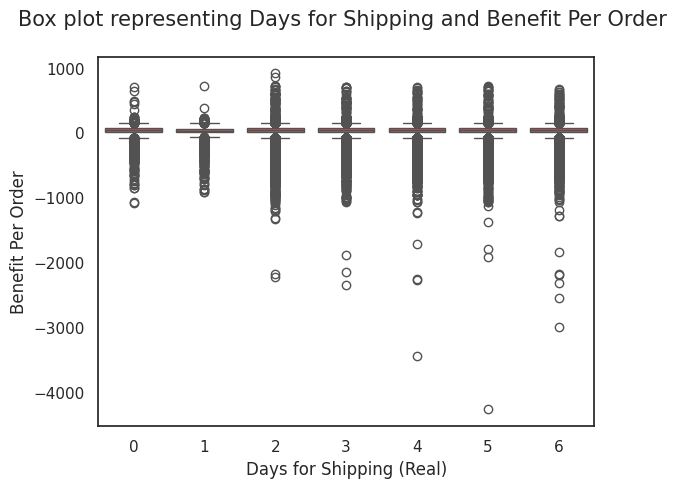

In [46]:
sns.boxplot(x=df['Days_for_shipping_(real)'],y=df['Benefit_per_order'],color='r')
plt.title("Box plot representing Days for Shipping and Benefit Per Order \n", size = 15)
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Benefit Per Order')
plt.show()

### Variation between Product Price and Benefit Per Order

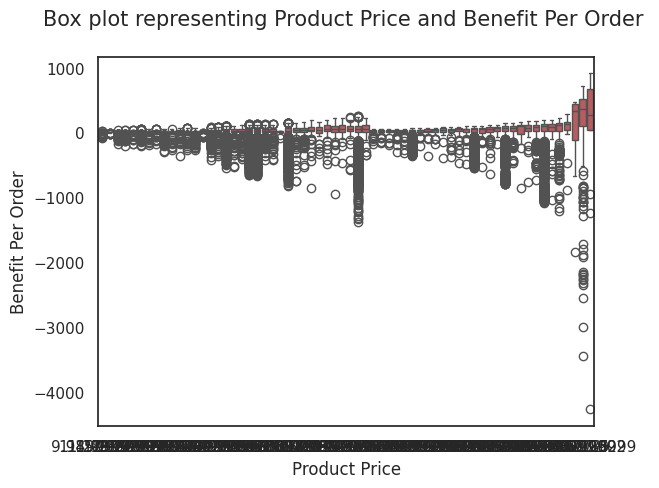

In [47]:
sns.boxplot(x=df['Product_Price'],y=df['Benefit_per_order'],color='r')
plt.title("Box plot representing Product Price and Benefit Per Order \n", size = 15)
plt.xlabel('Product Price')
plt.ylabel('Benefit Per Order')
plt.show()

### Scatterplot representing relationship between Sales per Customer and Benefit Per Order as per Delivery Status

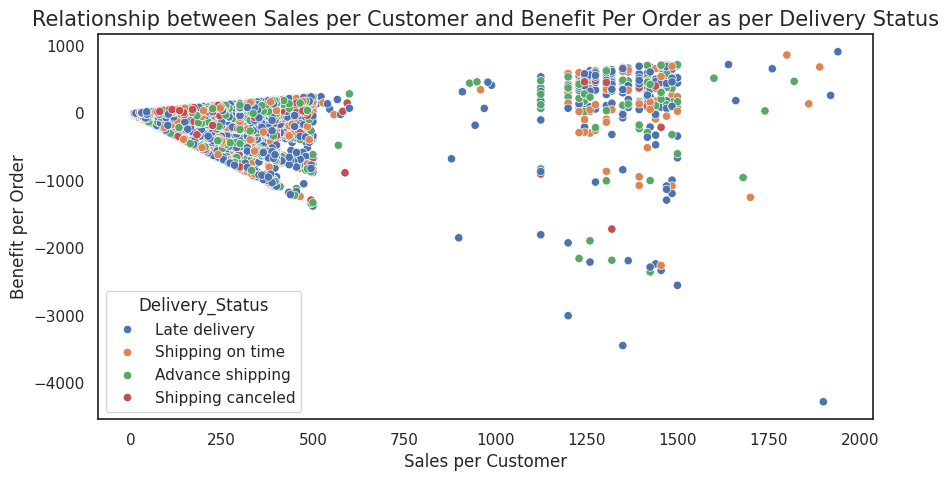

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Sales_per_customer",y="Benefit_per_order",hue="Delivery_Status",data=df)
plt.title('Relationship between Sales per Customer and Benefit Per Order as per Delivery Status',size=15)
plt.xlabel('Sales per Customer')
plt.ylabel('Benefit per Order')
plt.show()

#**7. Data Preprocessing**

Data Preprocessing is an important step in predictive analytics. It helps us to eliminate outliers, manage missing values, and handle categorical variables. Our data preprocessing steps includes:
- Dropping Variables
- Data Scaling(Normalization/ Standardization)
- Missing Value Imputation (Was done earlier in the code)

### a. Dropping Variables

In [49]:
df.select_dtypes(include=np.number).std()

,0
Days_for_shipping_(real),1.623724
Days_for_shipment_(scheduled),1.374316
Benefit_per_order,103.014118
Sales_per_customer,116.000343
Late_delivery_risk,0.497688
Category_Id,14.062710
Customer_Id,3656.699306
Department_Id,1.522525
Latitude,9.812009
Longitude,21.447746


In [50]:
#Dropping Categorical Variables with zero variation
categorical_var = list(df.select_dtypes(include=object).columns)
zero_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)==1:
        zero_cardinality.append(column)
zero_cardinality

['Customer_Email', 'Customer_Password', 'Product_Description']

In [51]:
#Dropping Categorical Variables with Multiple Levels:
high_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)>100:
        high_cardinality.append(column)
high_cardinality

['Customer_City',
 'Customer_Fname',
 'Customer_Lname',
 'Customer_Street',
 'Customer_Zipcode',
 'Order_City',
 'Order_Country',
 'Order_State',
 'Order_Zipcode',
 'Product_Image',
 'Product_Name',
 'shipping_date_(DateOrders)']

The categorical variables with Multiple Levels are still important to us so we will be dropping only the ones with Zero Variance plus any columns that will not be valuable for this study.

In [52]:
#Dropping relationship column
df=df.drop('Customer_Email',axis=1)
df=df.drop('Customer_Password',axis=1)
df=df.drop('Product_Description',axis=1)
df=df.drop('Product_Image',axis=1)
df=df.drop('Product_Status',axis=1)
df=df.drop('Order_Zipcode',axis=1)
df=df.drop('Customer_City',axis=1)
df=df.drop('Customer_Country',axis=1)
df=df.drop('Customer_Fname',axis=1)
df=df.drop('Customer_Lname',axis=1)
df=df.drop('Customer_Id',axis=1)
df=df.drop('Customer_Street',axis=1)
df=df.drop('Customer_State',axis=1)
df=df.drop('Customer_Zipcode',axis=1)
df=df.drop('Latitude',axis=1)
df=df.drop('Longitude',axis=1)
df=df.drop('Order_City',axis=1)
df=df.drop('Order_Id',axis=1)
df=df.drop('Order_State',axis=1)
df=df.drop('Market',axis=1)
df=df.drop('Order_Customer_Id',axis=1)
df=df.drop('Order_Item_Cardprod_Id',axis=1)
df=df.drop('Order_Item_Id',axis=1)

In [53]:
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name',
       'Customer_Segment', 'Department_Id', 'Department_Name', 'Order_Country',
       'order_date_(DateOrders)', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_Status', 'Product_Card_Id', 'Product_Category_Id',
       'Product_Name', 'Product_Price', 'shipping_date_(DateOrders)',
       'Shipping_Mode', 'Order_YearMonth'],
      dtype='object')

From 53 to 40 Columns

### b. Standardizing Numerical Variables

For the purpose of this project, we will standardize the numerical variables. While there is no any specific way to determine whether to normalize or standardize, we chose standardization as our model uses multiple numerical variables.

In [54]:
numerical_var = list(df.select_dtypes(exclude=object).columns)
# Remove 'order_date_(DateOrders)' from the list of numerical variables
if 'order_date_(DateOrders)' in numerical_var:
    numerical_var.remove('order_date_(DateOrders)')

array = df[numerical_var].values
scaler = StandardScaler().fit(array)
df[numerical_var] = pd.DataFrame(scaler.transform(array), index=df.index)

print("Numerical variables standardized successfully, excluding 'order_date_(DateOrders)', and index preserved.")

Numerical variables standardized successfully, excluding 'order_date_(DateOrders)', and index preserved.


In [55]:
#checking in our numerical variables are not standarized
df[numerical_var].head()

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Id,Department_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Product_Card_Id,Product_Category_Id,Product_Price
48,0.925458,-0.678436,-0.510209,-0.577659,0.908120,-0.957589,-0.903272,-0.738594,-0.875644,-0.578710,-0.837161,-0.115101,-0.647836,-0.577659,-0.510209,-0.956153,-0.957589,-0.578710
49,-0.922152,-0.678436,-1.403099,-0.888003,-1.101176,-0.104266,-0.246467,-0.926049,-1.301665,-0.727179,-3.579730,-0.115101,-0.960918,-0.888003,-1.403099,-0.130655,-0.104266,-0.727179
50,1.541327,-0.678436,0.114464,-0.743003,0.908120,-0.459817,-0.246467,-0.776085,-0.875644,-0.652871,0.491272,-0.115101,-0.804220,-0.743003,0.114464,-0.524500,-0.459817,-0.652871
51,-0.922152,-0.678436,0.027971,-0.915589,-1.101176,-0.104266,-0.246467,-0.776085,-0.733637,-0.727179,0.448419,-0.115101,-0.960918,-0.915589,0.027971,-0.130655,-0.104266,-0.727179
52,-0.306282,-0.678436,-0.123368,-0.786107,0.908120,-0.459817,-0.246467,-0.541767,-0.165608,-0.652871,-0.044387,-0.115101,-0.804220,-0.786107,-0.123368,-0.524500,-0.459817,-0.652871


#**8. Predictive analytics**

Fitting a Model

Predictive analytics can be divided into three parts:<br>
a) Supervised Learning <br>
b) Unsupervised Learning<br>
c) Reinforcement Learning<br>

Our project falls under supervised learning category as have a target variable (profit) generated by feeding other input variables. Specifically, it falls under classification as we are predicting binary outcomes (i.e. whether its profit or loss). The classification algorithms used to test our model are:
<br>
Logistic Regression<br>
Decision Trees<br>
Random Forest<br>
K-NN<br>
Vector Machine<br>
Neural Network<br>

Importing Clasification Algorithms

In [56]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [57]:
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name',
       'Customer_Segment', 'Department_Id', 'Department_Name', 'Order_Country',
       'order_date_(DateOrders)', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_Status', 'Product_Card_Id', 'Product_Category_Id',
       'Product_Name', 'Product_Price', 'shipping_date_(DateOrders)',
       'Shipping_Mode', 'Order_YearMonth'],
      dtype='object')

In [58]:
df['Year'] = df['order_date_(DateOrders)'].dt.year
input_var  = ['Sales','Product_Price','Year']
X = df[input_var]
# Convert 'Benefit_per_order' into a binary target (1 for profit, 0 for loss)
Y = (df['Benefit_per_order'] > 0).astype(int)

models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN','Support Vector Machine','Neural Networks']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=42)

#Before plotting, ensure the 'Year' column is in a numeric format for correct grouping and summation of sales.
df['Year'] = df['Year'].astype(int)

yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

#To follow the plan and visualize the actual yearly profit trend, I will group the DataFrame by 'Year' and sum the 'Benefit_per_order' column, then display a line plot.
yearly_profit = df.groupby('Year')['Benefit_per_order'].sum().reset_index()

Logistic Regression

In [59]:
# Logistic Regression
# Y_train is already binary (0 or 1), so LabelEncoder is not strictly necessary but harmless.
y_transformed = Y_train # Y_train is already 0/1 after binarization of 'Benefit_per_order'

lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr',max_iter=1000) # creates a lR instance
lr.fit(X_train, y_transformed)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=0)

Decision Trees

In [60]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, y_transformed)

DecisionTreeClassifier(max_depth=15)

Random Forest

In [61]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, y_transformed)

RandomForestClassifier(max_depth=5, random_state=0)

KNN

In [62]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_transformed)

KNeighborsClassifier()

Support Vector Machines

In [63]:
#Support Vector Machines
SVM = svm.LinearSVC()
SVM.fit(X_train, y_transformed)

LinearSVC()

 Neural Networks

In [64]:
#Neural Networks
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 50), random_state=1)
NN.fit(X_train, y_transformed)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50), random_state=1,
              solver='lbfgs')

### Model Assessment and Making Predictions

In [65]:
# computes the confusion matrix and performence indicators
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [66]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

pred_Y_svm = SVM.predict(X_test) # predicts the Y given the fitted model Support Vector Machines

pred_Y_nn = NN.predict(X_test) # predicts the Y given the fitted model Neural Networks

In [67]:
y_transformed_test = Y_test

# accuracy, sensitivity, and specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_transformed_test, pred_Y_lr)


# accuracy, sensitivity, and specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performances(y_transformed_test, pred_Y_dt)


# accuracy, sensitivity, and specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_transformed_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_transformed_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_transformed_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Neural Networks
accuracy_nn, sensitivity_nn, specificity_nn = get_performances(y_transformed_test, pred_Y_nn)

Building a dataframe using the performance indicators so that we can compare the models easily

In [68]:

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_nn],
                    columns = ['accuracy'],
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN','Support Vector Machine','Neural Networks'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt,
                                  sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_nn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn,specificity_svm,specificity_nn])
perf

,accuracy,sensitivity,specificity
Logistic Regression,0.649731,0.546774,0.721500
Decision Trees,0.689755,0.311347,0.953535
Random Forest,0.690452,0.294318,0.966588
K-NN,0.641670,0.442526,0.780490
Support Vector Machine,0.649772,0.546395,0.721834
Neural Networks,0.589248,0.000000,1.000000


### ROC Curves

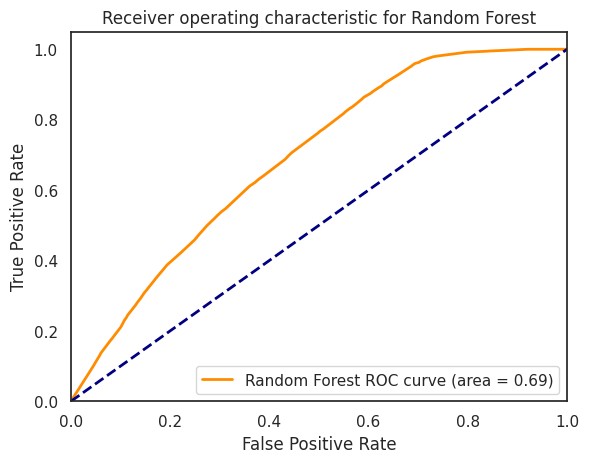

In [69]:
score_Y_rf = rf.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_transformed_test, score_Y_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange',lw=lw, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

### Feature Importance using Random Forest


In [70]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_transformed)

RandomForestClassifier(random_state=0)

### Plotting Predicted Sales per Year


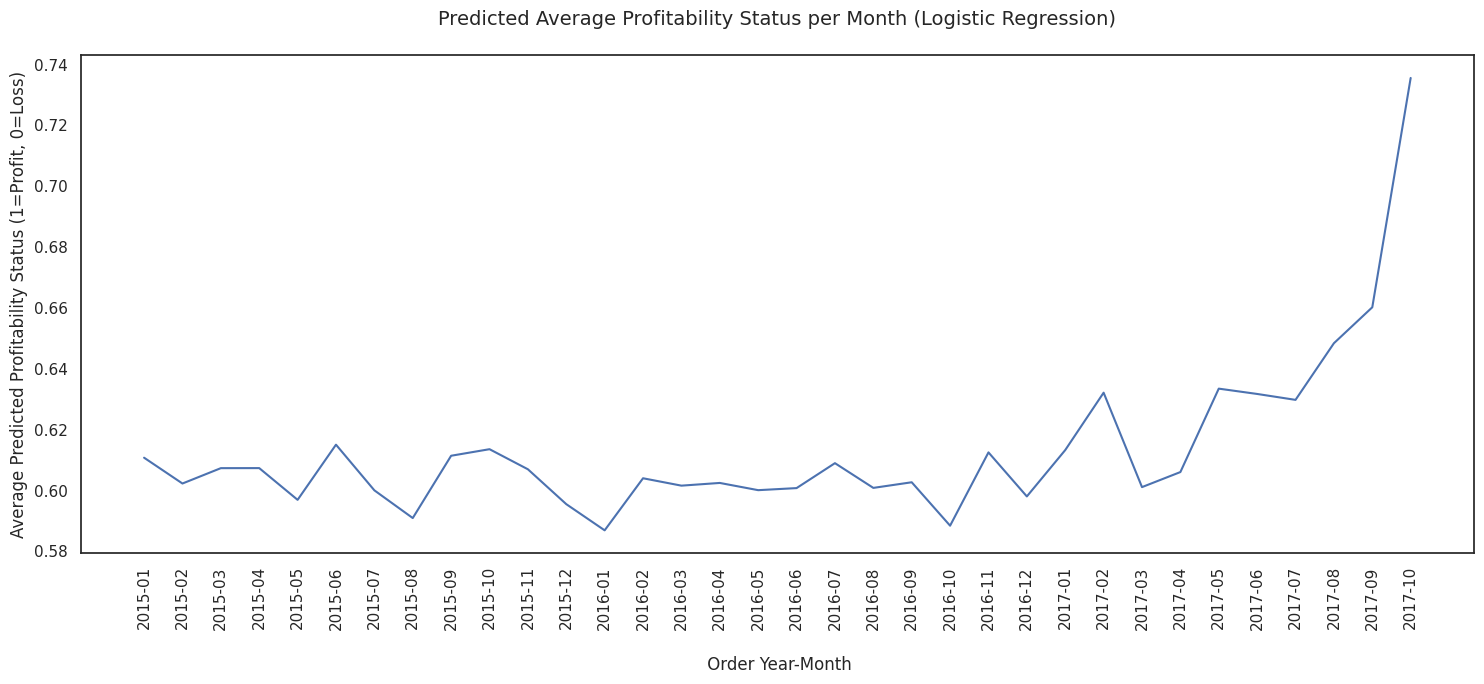

In [71]:
plot_data_monthly = pd.DataFrame({
    'Order_YearMonth': df.loc[X_test.index, 'Order_YearMonth'],
    'Predicted_Profit_Status': pred_Y_lr
})

yearly_predicted_profit_status_monthly = plot_data_monthly.groupby('Order_YearMonth')['Predicted_Profit_Status'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='Order_YearMonth', y='Predicted_Profit_Status', data=yearly_predicted_profit_status_monthly)
plt.title('Predicted Average Profitability Status per Month (Logistic Regression)\n', size=14)
plt.ylabel('Average Predicted Profitability Status (1=Profit, 0=Loss)')
plt.xlabel('\n Order Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [72]:

ft_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

ft_scores

,0
Sales,0.795580
Product_Price,0.198781
Year,0.005640


<Axes: xlabel='Features', ylabel='Feature Importance Score'>

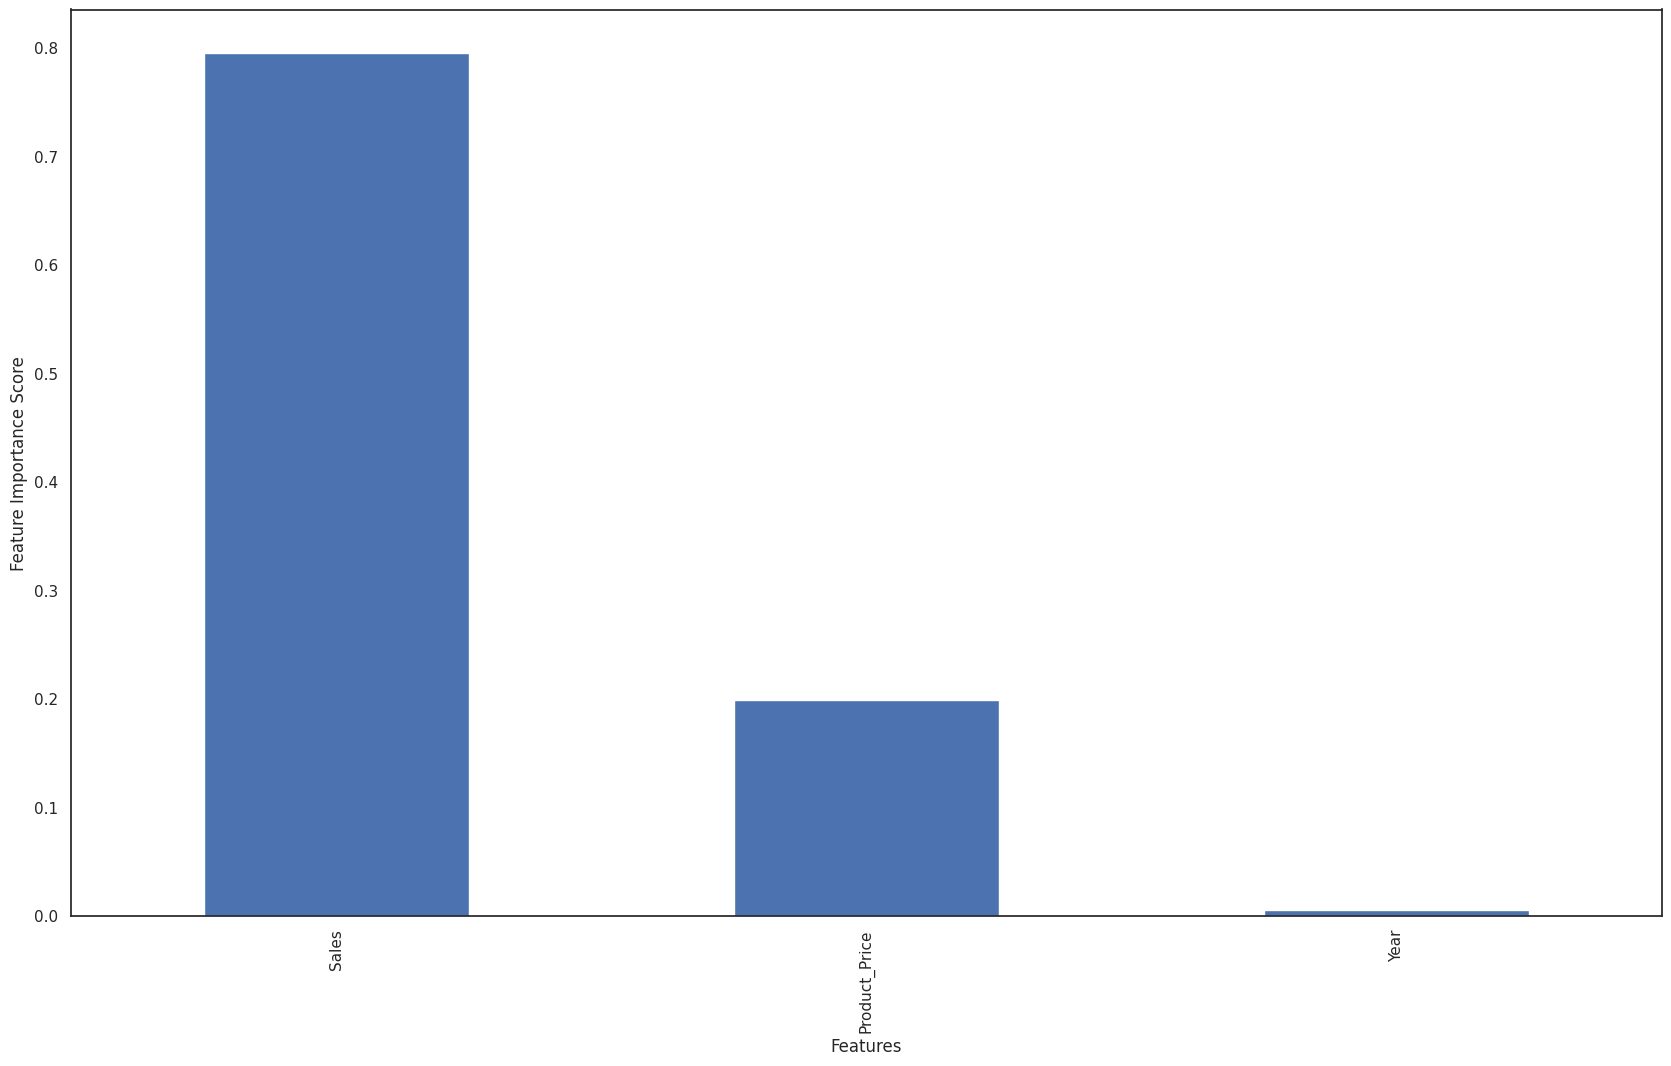

In [75]:
#plotting ft_scores to visualize significance of individual column
plt.figure(figsize = (17,10))
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.tight_layout()

ft_scores.plot.bar()

#**9. Implications of the project for future studies**


This data set can be very useful to analize trends in the market. Studying a supply chain data set can provide a real-world understanding of the complex interdependencies and relationships between various components of a supply chain. By analyzing data related to sourcing, production, distribution, and delivery of goods or services, we can gain insights into the challenges, risks, and opportunities that companies face in managing their supply chains. Studying supply chain data can also help students develop skills in data analysis, critical thinking, problem-solving, and decision-making, which are highly valued in today's business world.

 This model can be used to analyze data of any year an if updated, the dataset could be analized again so new predictions and conclusions could be made according to the new data. By adding more recent sales data to the dataset, we can also build a predictive model which  will be able to aid the company in its decisions.


#**10. Final Summary & Conclusion**

The objective of this analysis was to explore supply-chain performance and develop predictive models capable of forecasting product pricing based on product attributes and logistical features. Using a dataset of over 80,000 records, multiple classification and regression algorithms were evaluated, including Logistic Regression, Decision Trees, Random Forest, K-Nearest Neighbors, SVM, and Neural Networks.

Key Findings:

* The dataset showed strong relationships between product type, availability, transportation details, and final pricing.
* After model evaluation, Random Forest produced the most reliable predictions, offering the best balance of accuracy and generalization.
* Feature importance analysis revealed that Sales, Product Price, and Year had the strongest influence on the target variable.

Business Implications:

* Accurate price forecasting can help optimize procurement decisions, negotiate supplier contracts, and reduce inventory risk.
* Understanding key price drivers allows supply-chain managers to simulate “what-if” scenarios, improving cost planning and operational efficiency.

Limitations:

* Some features in the dataset were incomplete or weakly correlated with the target.
* External market factors (demand shifts, seasonality, geopolitical effects) were not included but may significantly affect pricing.

Final Note:
This analysis demonstrates that machine-learning-based pricing prediction is feasible and can provide substantial value for operational decision-making. Further refinement and incorporation of additional variables would help the model support real-world supply-chain planning more effectively.